In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [97]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [98]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


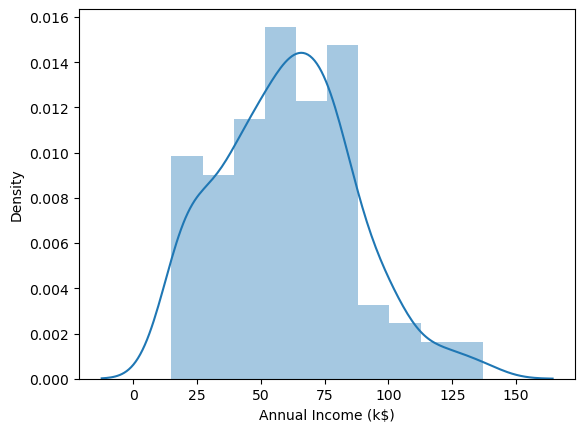

In [99]:
sns.distplot(df['Annual Income (k$)']);

In [100]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

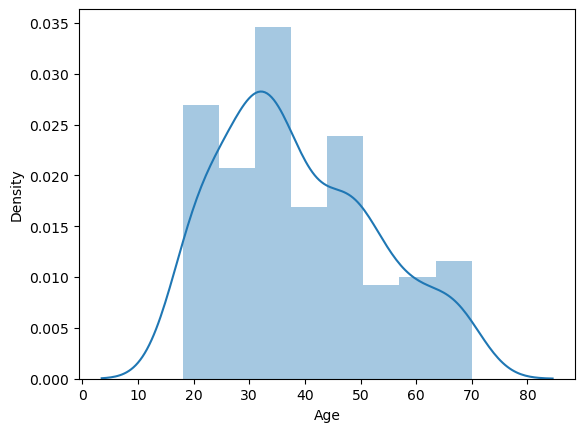

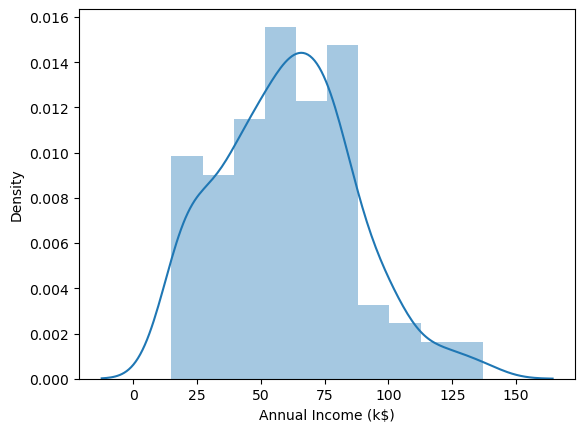

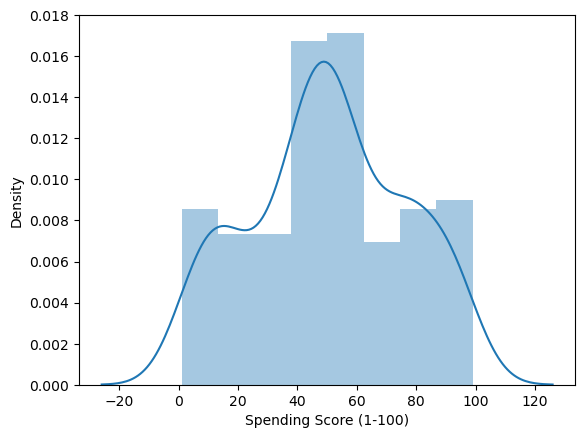

In [101]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

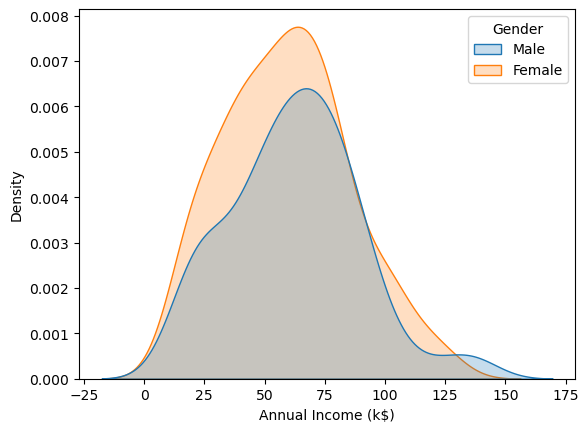

In [102]:
#sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);
sns.kdeplot(x=df['Annual Income (k$)'], shade=True, hue=df['Gender']);

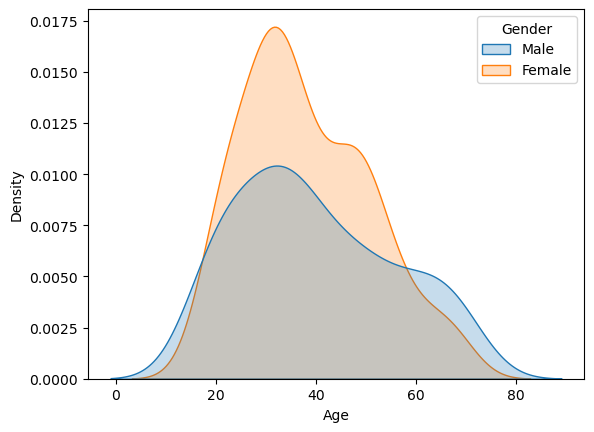

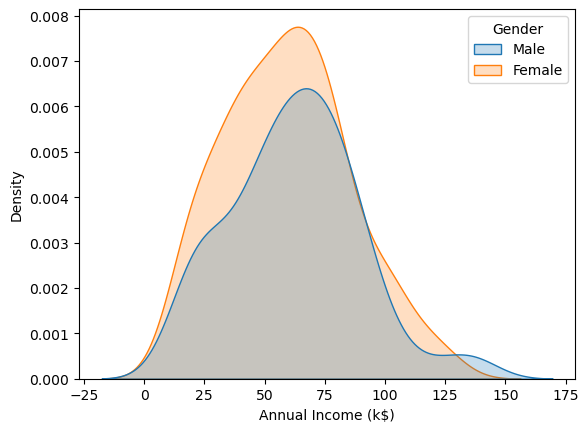

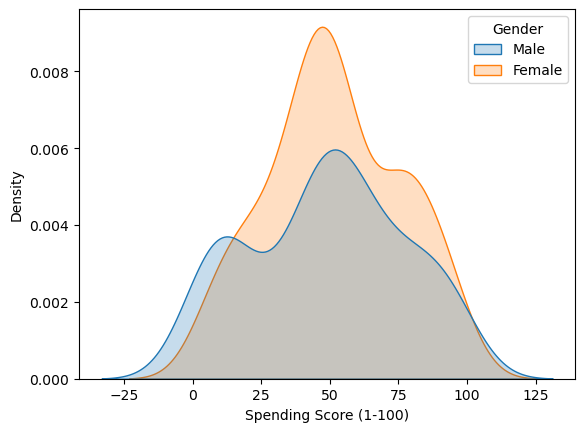

In [103]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i], shade=True, hue=df['Gender'])

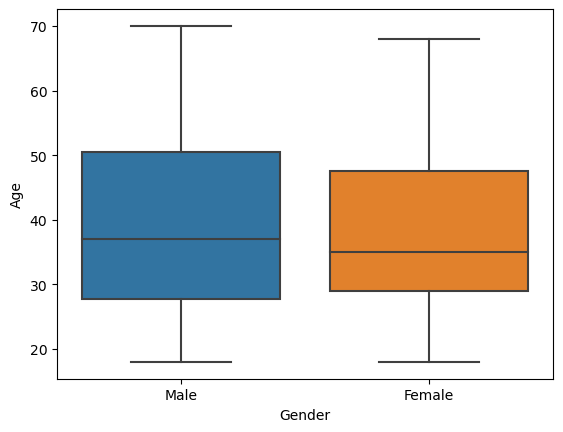

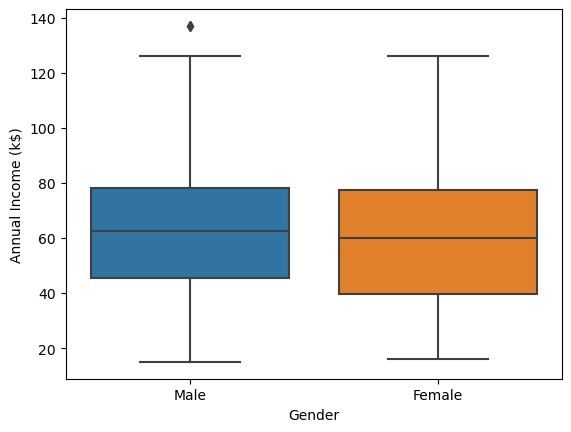

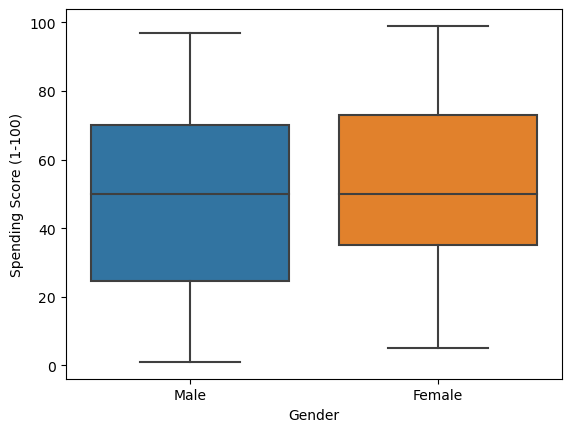

In [104]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [105]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivaiate Analysis

#Looking out for two variables

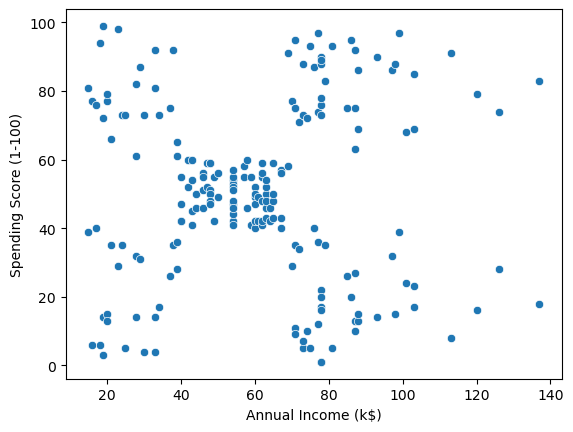

In [106]:
sns.scatterplot(data=df, x='Annual Income (k$)',
       y='Spending Score (1-100)');

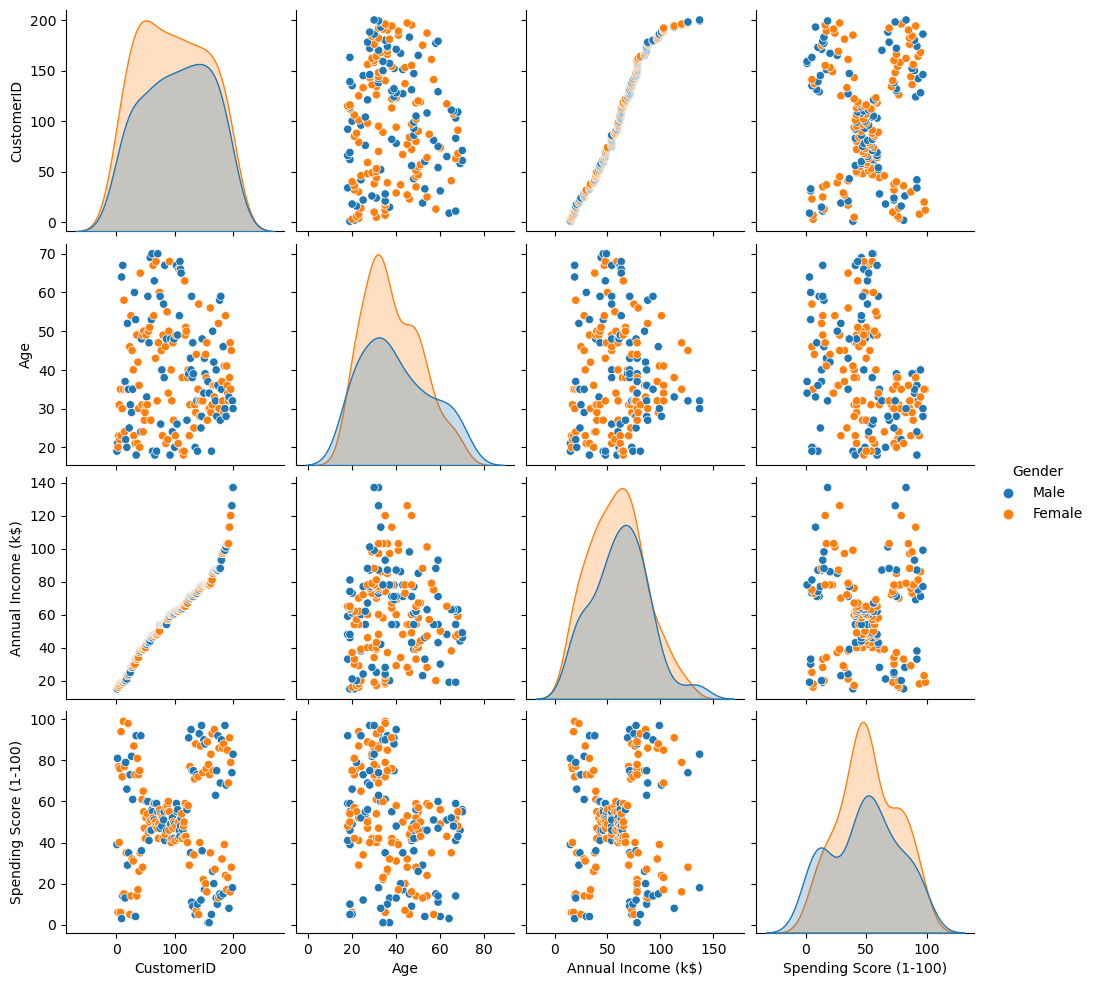

In [107]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [108]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [109]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

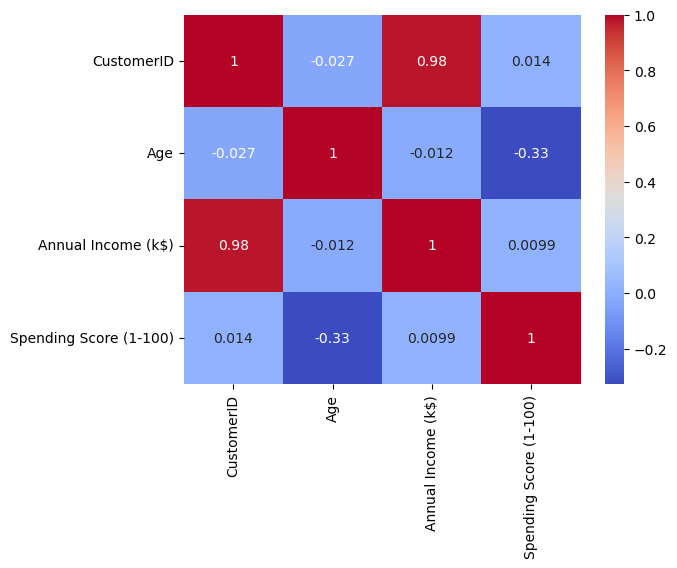

In [110]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Clustering - Univariate, Bivariate, multivariate

In [111]:
#Initiate algorithm, fit data into algorith(learn), grab labels from fit model(predict)
clustering1 = KMeans( n_clusters= 3)

In [112]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [113]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [114]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [115]:
df['Income Cluster'].value_counts()

1    92
0    72
2    36
Name: Income Cluster, dtype: int64

In [116]:
clustering1.inertia_

23528.15217391304

In [117]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [118]:
intertia_scores

[137277.28,
 48660.88888888889,
 23517.33093093093,
 13278.112713472487,
 8481.49619047619,
 5081.484660267268,
 3941.4163614163617,
 2857.441697191697,
 2251.122829131653,
 1743.4772727272725]

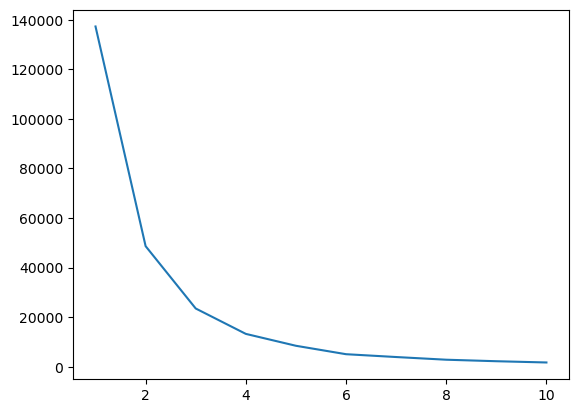

In [119]:
plt.plot(range(1,11), intertia_scores)

In [120]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [121]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,39.184783,66.717391,50.054348
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [122]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


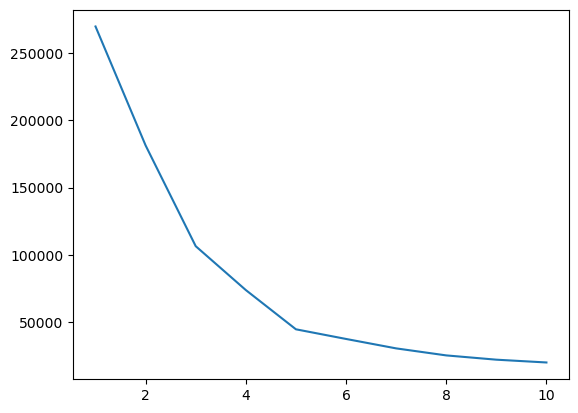

In [123]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [124]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

NameError: name 'clustering_bivaraiate' is not defined

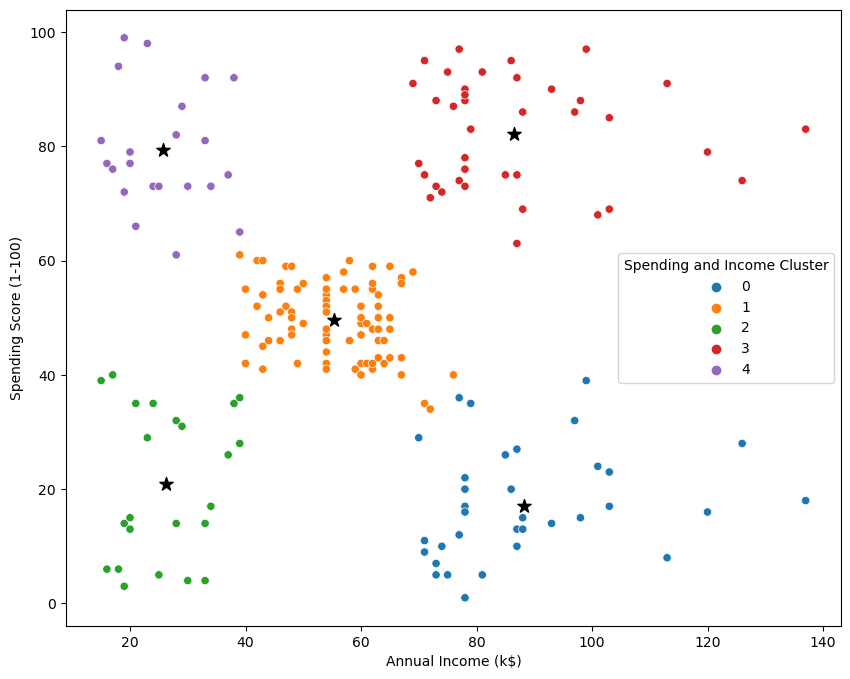

In [146]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')
plt.savefig(clustering_bivaraiate.png)

In [126]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.538462,0.461538
4,0.590909,0.409091


In [127]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


#Multivariate clustering

In [128]:
from sklearn.preprocessing import StandardScaler

In [135]:
scale = StandardScaler()

In [136]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


In [137]:
#Turn Gender to numerical value for clustering
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,2,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,2,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,2,0


In [138]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [139]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [140]:
dff = scale.fit_transform(dff)

In [142]:
dff = pd.DataFrame(scale.fit_transform(dff))

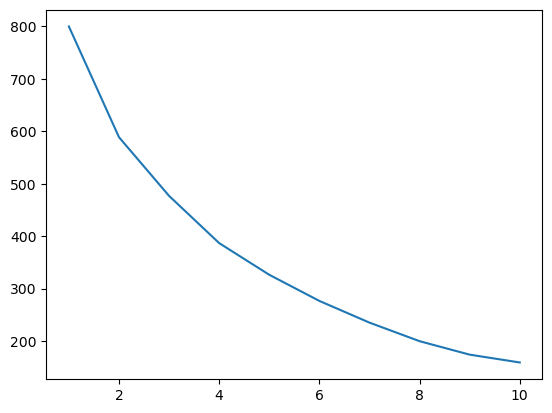

In [143]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

In [144]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,2,3
198,199,Male,32,137,18,2,0


In [145]:
df.to_csv('Clustering.csv')

In [ ]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()